In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

NAmes      326
CollgCr    188
OldTown    166
Sawyer     115
Gilbert    112
Edwards    112
Somerst    111
NWAmes      99
NridgHt     95
BrkSide     85
SawyerW     85
Mitchel     84
Crawfor     69
NoRidge     46
IDOTRR      43
Timber      42
StoneBr     38
SWISU       32
MeadowV     30
ClearCr     27
BrDale      21
Blmngtn     18
NPkVill     18
Veenker     15
Greens       7
Name: Neighborhood, dtype: int64
Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal', 'MoSold',
       'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr', 'gcode',
       'lat', 'long', 'dist', 'zip', 'tract', 'income', 'hood_Blmngtn',


/Users/Lena/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/Lena/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


lambda of LotArea = 0.05253143657204427
lambda of patioSF = 0.6151242703233625
lambda of Bsmt_ratio = 3.023308390020235


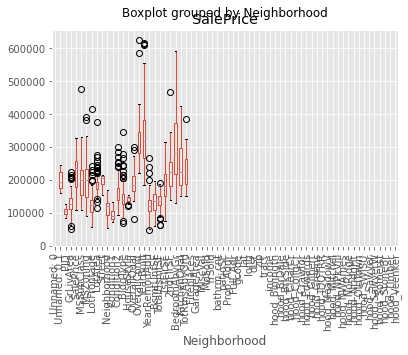

In [2]:
from Box_cox import X1, Y

In [3]:
X1.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'KitchenQual', 'Fireplaces', 'GarageArea', 'MiscVal', 'bathrm_cnt',
       'patioSF', 'dist', 'income', 'hood_Blmngtn', 'hood_BrDale',
       'hood_BrkSide', 'hood_ClearCr', 'hood_CollgCr', 'hood_Crawfor',
       'hood_Edwards', 'hood_Gilbert', 'hood_Greens', 'hood_IDOTRR',
       'hood_MeadowV', 'hood_Mitchel', 'hood_NPkVill', 'hood_NWAmes',
       'hood_NoRidge', 'hood_NridgHt', 'hood_OldTown', 'hood_SWISU',
       'hood_Sawyer', 'hood_SawyerW', 'hood_Somerst', 'hood_StoneBr',
       'hood_Timber', 'hood_Veenker', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'NearRR', 'NearPos', 'Artery', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Bsmt_ratio', 'Bedr_ratio', 'TotalBsmtSF',
       'bsmt_above_ratio'],
      dtype='object')

# Correlation Matrix

In [4]:
cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'KitchenQual', 'Fireplaces', 'GarageArea', 'MiscVal', 'bathrm_cnt',
       'patioSF', 'dist', 'income', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'NearRR', 'NearPos', 'Artery', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Bsmt_ratio', 'Bedr_ratio', 'TotalBsmtSF',
       'bsmt_above_ratio']

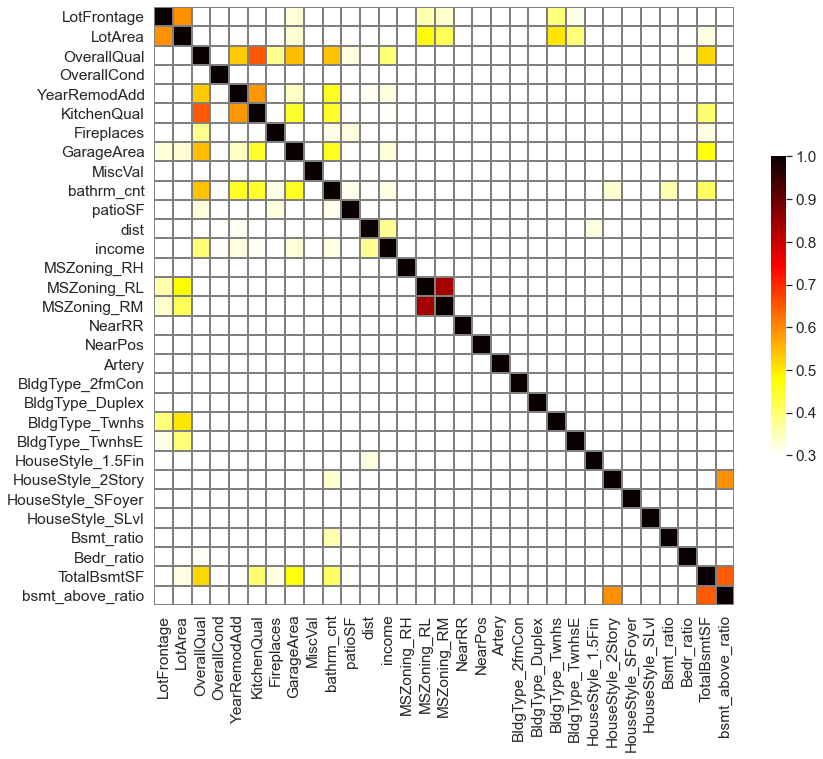

In [22]:
from copy import copy


train_corr = X1[cols].corr()
train_corr = abs(train_corr)
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)]=True

#conditions for filtering 0.6<=r<=0.9
sns.set(font_scale=1.4)

cmap =  copy(plt.cm.hot_r)
cmap.set_over("white")
cmap.set_under("white")


with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,11))
    sns.heatmap(abs(train_corr),
                vmax = 1,
                vmin = 0.3,
                cmap = cmap,
                cbar_kws = {'shrink':.5},
                linewidth = 1,
               linecolor = "grey");




In [25]:
# Drop: MSZoning_RL, YearRemodAdd, OveralQual, TotalBsmtSF, LotFrontage, Housstyles

cols = ['LotArea', 'OverallCond', 'KitchenQual', 
        'Fireplaces', 'GarageArea', 'MiscVal', 'bathrm_cnt',
       'patioSF', 'dist', 'income', 'MSZoning_RH', 
        'MSZoning_RM', 'NearRR', 'NearPos', 'Artery', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Bsmt_ratio', 'Bedr_ratio', 'bsmt_above_ratio']

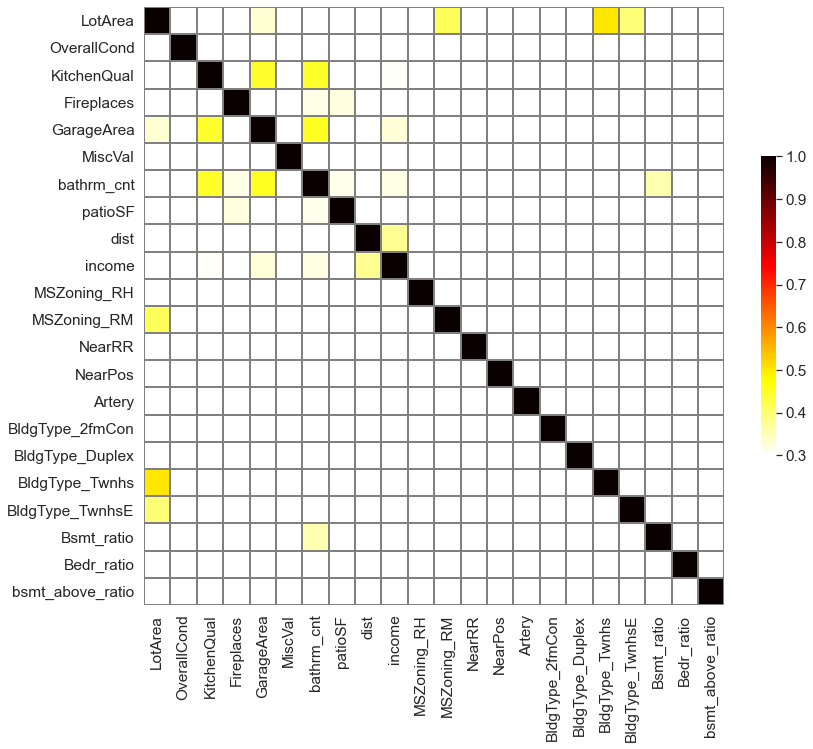

In [26]:
train_corr = X1[cols].corr()
train_corr = abs(train_corr)
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)]=True

#conditions for filtering 0.6<=r<=0.9
sns.set(font_scale=1.4)

cmap =  copy(plt.cm.hot_r)
cmap.set_over("white")
cmap.set_under("white")


with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,11))
    sns.heatmap(abs(train_corr),
                vmax = 1,
                vmin = 0.3,
                cmap = cmap,
                cbar_kws = {'shrink':.5},
                linewidth = 1,
               linecolor = "grey");

In [27]:
X1_num = X1[cols]

# Check Multicorrelation

In [28]:
def calc_VIF(df):
    names = df.columns
    values = df.values
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = names
    
    vif_data["VIF"] = [variance_inflation_factor(values, i)
                          for i in range(len(names))]
    
      
    vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
    print(vif_data)


In [29]:
calc_VIF(X1_num)

             feature         VIF
0            LotArea  103.607375
2        KitchenQual   46.595092
1        OverallCond   29.920084
20        Bedr_ratio   24.251909
6         bathrm_cnt   18.160855
9             income   14.392639
8               dist   13.057086
21  bsmt_above_ratio    9.931257
4         GarageArea    9.736637
7            patioSF    4.200994
19        Bsmt_ratio    3.083357
3         Fireplaces    2.518152
11       MSZoning_RM    1.606422
18   BldgType_TwnhsE    1.399662
17    BldgType_Twnhs    1.283730
16   BldgType_Duplex    1.176535
15   BldgType_2fmCon    1.092194
14            Artery    1.076850
12            NearRR    1.064438
13           NearPos    1.054012
10       MSZoning_RH    1.041788
5            MiscVal    1.020164


In [ ]:
X1_num.drop('YearRemodAdd', axis = 1, inplace = True)

In [ ]:
calc_VIF(X1_num)

In [ ]:
X1_num.drop('LotArea', axis = 1, inplace = True)

In [ ]:
calc_VIF(X1_num)

In [ ]:
X1_num.drop('OverallQual', axis = 1, inplace = True)

In [ ]:
calc_VIF(X1_num)

In [ ]:
X1_num.drop('TotalBsmtSF', axis = 1, inplace = True)

In [ ]:
calc_VIF(X1_num)

In [ ]:
X1_num.drop('OverallCond', axis = 1, inplace = True)

In [ ]:
calc_VIF(X1_num)